In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

In [2]:
os.chdir('../Data/')

In [3]:
df = pd.read_csv('orders.csv')

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
df2 = pd.read_csv('order_products__prior.csv')

In [7]:
df2.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
df = df.merge(df2,on='order_id')

In [9]:
del df2

In [10]:
products = pd.read_csv('products.csv')

In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
df = df.merge(products,on='product_id')

In [13]:
aisles = pd.read_csv('aisles.csv')

In [14]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
df = df.merge(aisles,on='aisle_id')

In [16]:
departments = pd.read_csv('departments.csv')

In [17]:
df = df.merge(departments,on='department_id')

## Reordered by hour of day

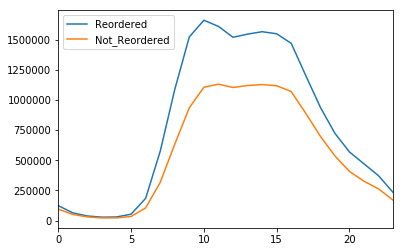

In [64]:
hour_of_day_reordered = pd.DataFrame(df[df.reordered == 1].order_hour_of_day.value_counts()).sort_index()
hour_of_day_non_reordered = pd.DataFrame(df[df.reordered == 0].order_hour_of_day.value_counts()).sort_index()
reordered_by_hour = pd.merge(hour_of_day_reordered,hour_of_day_non_reordered,left_index=True,right_index=True)
reordered_by_hour.columns = ['Reordered', 'Not_Reordered']
reordered_by_hour.plot()

## Reordered by day of week

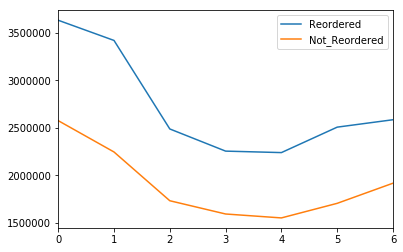

In [65]:
dow_reordered = pd.DataFrame(df[df.reordered == 1].order_dow.value_counts()).sort_index()
dow_non_reordered = pd.DataFrame(df[df.reordered == 0].order_dow.value_counts()).sort_index()
reordered_dow = pd.merge(dow_reordered,dow_non_reordered,left_index=True,right_index=True)
reordered_dow.columns = ['Reordered', 'Not_Reordered']
reordered_dow.plot()

## Reordered by hour of week

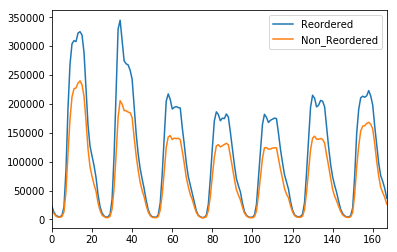

In [89]:
hour_day_index = pd.DataFrame(index=range(0,168),data=np.array(range(0,168)).T)
hour_day_index.columns = ['Hour']

df['Hour'] = (df.order_dow * 24) + df.order_hour_of_day

hour_reordered = pd.DataFrame(df[df.reordered == 1].Hour.value_counts()).sort_index()
hour_reordered.reset_index(inplace=True)
hour_reordered.columns = ['Hour','Reordered']

hour_non_reordered = pd.DataFrame(df[df.reordered == 0].Hour.value_counts()).sort_index()
hour_non_reordered.reset_index(inplace=True)
hour_non_reordered.columns = ['Hour','Non_Reordered']

hour_day_index = pd.merge(hour_day_index,hour_reordered,on='Hour')
hour_day_index = pd.merge(hour_day_index,hour_non_reordered,on='Hour')
hour_day_index.drop('Hour',inplace=True,axis=1)

hour_day_index.plot()

## Most and Least Reordered Items

In [102]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Hour,product_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,56,Soda
1,2398795,1,prior,2,3,7,15.0,196,1,1,79,Soda
2,473747,1,prior,3,3,12,21.0,196,1,1,84,Soda
3,2254736,1,prior,4,4,7,29.0,196,1,1,103,Soda
4,431534,1,prior,5,4,15,28.0,196,1,1,111,Soda


In [123]:
most_reordered = df[(df.reordered==1) & (df.order_number > 10)].product_name.value_counts()[:26]

In [124]:
most_non_reordered = df[(df.reordered==0) & (df.order_number > 10)].product_name.value_counts()[:26]

In [125]:
most_reordered

Banana                                  237396
Bag of Organic Bananas                  210396
Organic Strawberries                    128735
Organic Baby Spinach                    118407
Organic Hass Avocado                    112995
Organic Avocado                          77062
Organic Whole Milk                       74922
Organic Raspberries                      74478
Large Lemon                              70126
Strawberries                             64064
Limes                                    63345
Organic Yellow Onion                     55592
Organic Zucchini                         52015
Organic Garlic                           51633
Apple Honeycrisp Organic                 46811
Organic Fuji Apple                       41541
Organic Blueberries                      40423
Organic Lemon                            40397
Organic Large Extra Fancy Fuji Apple     40232
Organic Half & Half                      39877
Cucumber Kirby                           39621
Organic Cucum

In [126]:
most_non_reordered

Large Lemon                      12665
Bag of Organic Bananas           12176
Strawberries                     10954
Organic Zucchini                 10112
Limes                             9978
Organic Strawberries              9513
Organic Blueberries               9461
Organic Yellow Onion              9228
Organic Baby Spinach              9189
Organic Raspberries               9119
Organic Red Onion                 8774
Banana                            8461
Organic Cilantro                  8370
Seedless Red Grapes               8346
Organic Hass Avocado              8253
Asparagus                         7694
Organic Baby Carrots              7670
Organic Small Bunch Celery        7541
Extra Virgin Olive Oil            7480
Organic Garlic                    7412
Apple Honeycrisp Organic          7323
Organic Grape Tomatoes            7315
Fresh Cauliflower                 7126
Organic Cucumber                  7090
Organic Italian Parsley Bunch     7037
Yellow Onions            

## User Average Cartsize

In [134]:
cart_size_df = pd.read_pickle('full_features')[['product_total_orders','in_cart']]

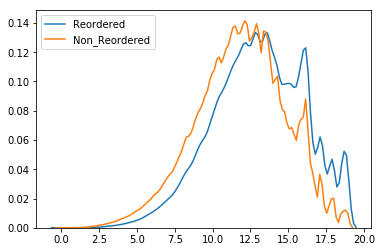

In [136]:
sns.kdeplot(cart_size_df[cart_size_df.in_cart==1].product_total_orders,label='Reordered')
sns.kdeplot(cart_size_df[cart_size_df.in_cart==0].product_total_orders,label='Non_Reordered')

In [12]:
df[(df.order_hour_of_day <= 12)].product_name.value_counts()[:26] 

Banana                        207720
Bag of Organic Bananas        167034
Organic Strawberries          113774
Organic Baby Spinach          103863
Organic Hass Avocado           91046
Organic Avocado                74718
Large Lemon                    66589
Strawberries                   63774
Organic Raspberries            60691
Organic Whole Milk             60640
Limes                          60175
Organic Yellow Onion           49195
Organic Garlic                 46640
Organic Zucchini               44625
Organic Blueberries            43465
Organic Fuji Apple             41276
Cucumber Kirby                 40825
Organic Half & Half            38281
Apple Honeycrisp Organic       38210
Organic Lemon                  37518
Seedless Red Grapes            36949
Organic Grape Tomatoes         35523
Honeycrisp Apple               35499
Sparkling Water Grapefruit     34545
Organic Baby Carrots           34313
Organic Cucumber               33991
Name: product_name, dtype: int64

In [33]:
df[(df.order_hour_of_day == 5)].product_name.value_counts()[:26]

Banana                                  1315
Bag of Organic Bananas                  1022
Organic Strawberries                     736
Organic Baby Spinach                     681
Organic Hass Avocado                     595
Strawberries                             452
Large Lemon                              414
Organic Avocado                          405
Organic Raspberries                      390
Organic Whole Milk                       375
Limes                                    319
Cucumber Kirby                           305
Organic Yellow Onion                     295
Organic Blueberries                      293
Organic Zucchini                         284
Organic Garlic                           274
Apple Honeycrisp Organic                 259
Organic Baby Carrots                     243
Organic Cucumber                         231
Organic Lemon                            227
Seedless Red Grapes                      223
Fresh Cauliflower                        219
Organic La

In [15]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks


# New Orders and re-orders by aisle

In [132]:
reorders_by_aisle = pd.DataFrame(df[df.reordered == 1].aisle.value_counts())
reorders_by_aisle.reset_index(inplace=True)
reorders_by_aisle.columns = ['Aisle','Number of Orders']
non_reorders_by_aisle = pd.DataFrame(df[df.reordered == 0].aisle.value_counts())
non_reorders_by_aisle.reset_index(inplace=True)
non_reorders_by_aisle.columns = ['Aisle','Number of Orders']

In [133]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [134]:
total_orders = df.order_id.nunique()

In [135]:
total_orders

3214874

In [136]:
order_ids_containing_reorder_by_aisle = pd.DataFrame(
                                        df[df.reordered == 1]
                                        .groupby('aisle',as_index=False)['order_id']
                                        .nunique())
reorder_aisle_index = (pd.DataFrame(
                        pd.DataFrame(
                        df[df.reordered == 1]
                        .groupby('aisle',as_index=False)
                        .size())
                        .reset_index()
                        .aisle))
reorder_aisle_index['Order Status'] = 'Reordered'
percent_containing_aisle_reorder = pd.merge(order_ids_containing_reorder_by_aisle,reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_reorder['total_orders'] = total_orders
percent_containing_aisle_reorder['Percent of Reorders Containing Aisle'] = percent_containing_aisle_reorder.order_id / percent_containing_aisle_reorder.total_orders
percent_containing_aisle_reorder.columns = ['Orders_containing_department','Aisle','Order Status','total_orders','Percent of Reorders Containing Aisle']
percent_containing_aisle_reorder = pd.merge(reorders_by_aisle,percent_containing_aisle_reorder,on='Aisle')

In [137]:
order_ids_containing_non_reorder_by_aisle = (pd.DataFrame(
                    df[df.reordered == 0]
                    .groupby('aisle',as_index=False)['order_id']
                    .nunique()))
non_reorder_aisle_index = (pd.DataFrame(
                            pd.DataFrame(
                            df[df.reordered == 0]
                            .groupby('aisle',as_index=False)
                            .size())
                            .reset_index()
                            .aisle))
non_reorder_aisle_index['Order Status'] = 'First Order'
percent_containing_aisle_non_reorder = pd.merge(order_ids_containing_non_reorder_by_aisle,non_reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_non_reorder['total_orders'] = total_orders
percent_containing_aisle_non_reorder['Percent of Reorders Containing Aisle'] = percent_containing_aisle_non_reorder.order_id / percent_containing_aisle_non_reorder.total_orders
percent_containing_aisle_non_reorder.columns = ['Orders_containing_department','Aisle','Order Status','total_orders','Percent of Reorders Containing Aisle']
percent_containing_aisle_non_reorder = pd.merge(non_reorders_by_aisle,percent_containing_aisle_non_reorder,on='Aisle')

In [138]:
percent_containing_aisle_non_reorder.head()

,Aisle,Number of Orders,Orders_containing_department,Order Status,total_orders,Percent of Reorders Containing Aisle
0,fresh vegetables,1385849,777161,First Order,3214874,0.241739
1,fresh fruits,1026719,695879,First Order,3214874,0.216456
2,packaged vegetables fruits,638136,501813,First Order,3214874,0.156091
3,yogurt,455325,302464,First Order,3214874,0.094083
4,packaged cheese,406380,335149,First Order,3214874,0.104249


In [139]:
percentage_reorders_by_aisle = pd.concat([percent_containing_aisle_reorder,percent_containing_aisle_non_reorder]).drop(['Orders_containing_department','total_orders'],axis=1)

In [140]:
percentage_reorders_by_aisle.head()

,Aisle,Number of Orders,Order Status,Percent of Reorders Containing Aisle
0,fresh fruits,2615469,Reordered,0.443896
1,fresh vegetables,2032172,Reordered,0.317691
2,packaged vegetables fruits,1127177,Reordered,0.255022
3,yogurt,997018,Reordered,0.195040
4,milk,696264,Reordered,0.193615


In [141]:
pd.to_pickle(percentage_reorders_by_aisle,'percentage_reorders_by_aisle')

In [ ]:
percentage_reorders_by_aisle

# New Orders and re-orders by Department

In [121]:
reorders_by_aisle = pd.DataFrame(df[df.reordered == 1].department.value_counts())
reorders_by_aisle.reset_index(inplace=True)
reorders_by_aisle.columns = ['Department','Number of Orders']
non_reorders_by_aisle = pd.DataFrame(df[df.reordered == 0].department.value_counts())
non_reorders_by_aisle.reset_index(inplace=True)
non_reorders_by_aisle.columns = ['Department','Number of Orders']

In [122]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [41]:
total_orders = df.order_id.nunique()

In [42]:
total_orders

3214874

In [124]:
order_ids_containing_reorder_by_aisle = pd.DataFrame(
                                        df[df.reordered == 1]
                                        .groupby('department',as_index=False)['order_id']
                                        .nunique())
reorder_aisle_index = (pd.DataFrame(
                        pd.DataFrame(
                        df[df.reordered == 1]
                        .groupby('department',as_index=False)
                        .size())
                        .reset_index()
                        .department))
reorder_aisle_index['Order Status'] = 'Reordered'
percent_containing_aisle_reorder = pd.merge(order_ids_containing_reorder_by_aisle,reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_reorder['total_orders'] = total_orders
percent_containing_aisle_reorder['Percent of Reorders Containing Department'] = percent_containing_aisle_reorder.order_id / percent_containing_aisle_reorder.total_orders
percent_containing_aisle_reorder.columns = ['Orders_containing_department','Department','Order Status','total_orders','Percent of Reorders Containing Department']
percent_containing_aisle_reorder = pd.merge(reorders_by_aisle,percent_containing_aisle_reorder,on='Department')

In [127]:
order_ids_containing_non_reorder_by_aisle = (pd.DataFrame(
                    df[df.reordered == 0]
                    .groupby('department',as_index=False)['order_id']
                    .nunique()))
non_reorder_aisle_index = (pd.DataFrame(
                            pd.DataFrame(
                            df[df.reordered == 0]
                            .groupby('department',as_index=False)
                            .size())
                            .reset_index()
                            .department))
non_reorder_aisle_index['Order Status'] = 'First Order'
percent_containing_aisle_non_reorder = pd.merge(order_ids_containing_non_reorder_by_aisle,non_reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_non_reorder['total_orders'] = total_orders
percent_containing_aisle_non_reorder['Percent of Reorders Containing Department'] = percent_containing_aisle_non_reorder.order_id / percent_containing_aisle_non_reorder.total_orders
percent_containing_aisle_non_reorder.columns = ['Orders_containing_department','Department','Order Status','total_orders','Percent of Reorders Containing Department']
percent_containing_aisle_non_reorder = pd.merge(non_reorders_by_aisle,percent_containing_aisle_non_reorder,on='Department')

In [128]:
percent_containing_aisle_non_reorder.head()

,Department,Number of Orders,Orders_containing_department,Order Status,total_orders,Percent of Reorders Containing Department
0,produce,3318581,1380815,First Order,3214874,0.429508
1,dairy eggs,1786795,1022520,First Order,3214874,0.318059
2,snacks,1229577,725439,First Order,3214874,0.225651
3,pantry,1225276,769846,First Order,3214874,0.239464
4,frozen,1024542,625068,First Order,3214874,0.194430


In [129]:
percentage_reorders_by_aisle = pd.concat([percent_containing_aisle_reorder,percent_containing_aisle_non_reorder]).drop(['Orders_containing_department','total_orders'],axis=1)

In [130]:
percentage_reorders_by_aisle.head()

,Department,Number of Orders,Order Status,Percent of Reorders Containing Department
0,produce,6160710,Reordered,0.610559
1,dairy eggs,3627221,Reordered,0.527302
2,beverages,1757892,Reordered,0.332406
3,snacks,1657973,Reordered,0.289274
4,frozen,1211890,Reordered,0.237016


In [131]:
pd.to_pickle(percentage_reorders_by_aisle,'percentage_reorders_by_department')

In [ ]:
percentage_reorders_by_aisle

# Percent Orders Containing Product

In [31]:
df_before_noon = df[(df.reordered==1) & (df.order_hour_of_day == 9)]
df_after_noon = df[(df.reordered==1) & (df.order_hour_of_day == 19)]

In [32]:
total_orders_before_noon = df_before_noon.order_id.nunique()
total_orders_before_noon = df_after_noon.order_id.nunique()

In [33]:
order_ids_containing_reorder_by_aisle = pd.DataFrame(
                                        df_before_noon
                                        .groupby('product_name',as_index=False)['order_id']
                                        .nunique())
reorder_aisle_index = (pd.DataFrame(
                        pd.DataFrame(
                        df_before_noon
                        .groupby('product_name',as_index=False)
                        .size())
                        .reset_index()
                        .product_name))
percent_containing_aisle_reorder = pd.merge(order_ids_containing_reorder_by_aisle,reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_reorder['total_orders'] = total_orders
percent_containing_aisle_reorder['Percent of Reorders Containing Product'] = percent_containing_aisle_reorder.order_id / percent_containing_aisle_reorder.total_orders
percent_containing_aisle_reorder.columns = ['Orders_containing_product','Product','total_orders','Percent of Reorders Containing Product']

In [34]:
percent_containing_aisle_reorder.sort_values('Percent of Reorders Containing Product',ascending=False).head(20)

,Orders_containing_product,Product,total_orders,Percent of Reorders Containing Product
2179,32844,Banana,3214874,0.010216
2039,25595,Bag of Organic Bananas,3214874,0.007961
20051,15648,Organic Strawberries,3214874,0.004867
17720,13655,Organic Baby Spinach,3214874,0.004247
18814,12621,Organic Hass Avocado,3214874,0.003926
17692,9852,Organic Avocado,3214874,0.003065
20477,9116,Organic Whole Milk,3214874,0.002836
19613,8771,Organic Raspberries,3214874,0.002728
26975,8284,Strawberries,3214874,0.002577
13823,8121,Large Lemon,3214874,0.002526


In [35]:
order_ids_containing_reorder_by_aisle = pd.DataFrame(
                                        df_after_noon
                                        .groupby('product_name',as_index=False)['order_id']
                                        .nunique())
reorder_aisle_index = (pd.DataFrame(
                        pd.DataFrame(
                        df_after_noon
                        .groupby('product_name',as_index=False)
                        .size())
                        .reset_index()
                        .product_name))
percent_containing_aisle_reorder = pd.merge(order_ids_containing_reorder_by_aisle,reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_reorder['total_orders'] = total_orders
percent_containing_aisle_reorder['Percent of Reorders Containing Product'] = percent_containing_aisle_reorder.order_id / percent_containing_aisle_reorder.total_orders
percent_containing_aisle_reorder.columns = ['Orders_containing_product','Product','total_orders','Percent of Reorders Containing Product']

In [36]:
percent_containing_aisle_reorder.sort_values('Percent of Reorders Containing Product',ascending=False).head(20)

,Orders_containing_product,Product,total_orders,Percent of Reorders Containing Product
1911,15490,Banana,3214874,0.004818
1786,12178,Bag of Organic Bananas,3214874,0.003788
17710,8084,Organic Strawberries,3214874,0.002515
15599,7193,Organic Baby Spinach,3214874,0.002237
16588,6656,Organic Hass Avocado,3214874,0.002070
15572,5182,Organic Avocado,3214874,0.001612
18084,4350,Organic Whole Milk,3214874,0.001353
17316,3990,Organic Raspberries,3214874,0.001241
23794,3678,Strawberries,3214874,0.001144
12122,3601,Large Lemon,3214874,0.001120


# BkjaksjhflkbadglkhadfkljLGLJHGLJGLJGH

In [121]:
reorders_by_aisle = pd.DataFrame(df[df.reordered == 1].department.value_counts())
reorders_by_aisle.reset_index(inplace=True)
reorders_by_aisle.columns = ['Department','Number of Orders']
non_reorders_by_aisle = pd.DataFrame(df[df.reordered == 0].department.value_counts())
non_reorders_by_aisle.reset_index(inplace=True)
non_reorders_by_aisle.columns = ['Department','Number of Orders']

In [122]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [41]:
total_orders = df.order_id.nunique()

In [42]:
total_orders

3214874

In [124]:
order_ids_containing_reorder_by_aisle = pd.DataFrame(
                                        df[df.reordered == 1]
                                        .groupby('department',as_index=False)['order_id']
                                        .nunique())
reorder_aisle_index = (pd.DataFrame(
                        pd.DataFrame(
                        df[df.reordered == 1]
                        .groupby('department',as_index=False)
                        .size())
                        .reset_index()
                        .department))
reorder_aisle_index['Order Status'] = 'Reordered'
percent_containing_aisle_reorder = pd.merge(order_ids_containing_reorder_by_aisle,reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_reorder['total_orders'] = total_orders
percent_containing_aisle_reorder['Percent of Reorders Containing Department'] = percent_containing_aisle_reorder.order_id / percent_containing_aisle_reorder.total_orders
percent_containing_aisle_reorder.columns = ['Orders_containing_department','Department','Order Status','total_orders','Percent of Reorders Containing Department']
percent_containing_aisle_reorder = pd.merge(reorders_by_aisle,percent_containing_aisle_reorder,on='Department')

In [127]:
order_ids_containing_non_reorder_by_aisle = (pd.DataFrame(
                    df[df.reordered == 0]
                    .groupby('department',as_index=False)['order_id']
                    .nunique()))
non_reorder_aisle_index = (pd.DataFrame(
                            pd.DataFrame(
                            df[df.reordered == 0]
                            .groupby('department',as_index=False)
                            .size())
                            .reset_index()
                            .department))
non_reorder_aisle_index['Order Status'] = 'First Order'
percent_containing_aisle_non_reorder = pd.merge(order_ids_containing_non_reorder_by_aisle,non_reorder_aisle_index,left_index=True,right_index=True)
percent_containing_aisle_non_reorder['total_orders'] = total_orders
percent_containing_aisle_non_reorder['Percent of Reorders Containing Department'] = percent_containing_aisle_non_reorder.order_id / percent_containing_aisle_non_reorder.total_orders
percent_containing_aisle_non_reorder.columns = ['Orders_containing_department','Department','Order Status','total_orders','Percent of Reorders Containing Department']
percent_containing_aisle_non_reorder = pd.merge(non_reorders_by_aisle,percent_containing_aisle_non_reorder,on='Department')

In [128]:
percent_containing_aisle_non_reorder.head()

,Department,Number of Orders,Orders_containing_department,Order Status,total_orders,Percent of Reorders Containing Department
0,produce,3318581,1380815,First Order,3214874,0.429508
1,dairy eggs,1786795,1022520,First Order,3214874,0.318059
2,snacks,1229577,725439,First Order,3214874,0.225651
3,pantry,1225276,769846,First Order,3214874,0.239464
4,frozen,1024542,625068,First Order,3214874,0.194430


In [129]:
percentage_reorders_by_aisle = pd.concat([percent_containing_aisle_reorder,percent_containing_aisle_non_reorder]).drop(['Orders_containing_department','total_orders'],axis=1)

In [130]:
percentage_reorders_by_aisle.head()

,Department,Number of Orders,Order Status,Percent of Reorders Containing Department
0,produce,6160710,Reordered,0.610559
1,dairy eggs,3627221,Reordered,0.527302
2,beverages,1757892,Reordered,0.332406
3,snacks,1657973,Reordered,0.289274
4,frozen,1211890,Reordered,0.237016


In [131]:
pd.to_pickle(percentage_reorders_by_aisle,'percentage_reorders_by_department')

In [ ]:
percentage_reorders_by_aisle